In [9]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None)

df.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]

X = df.drop('Class label', 1)
y = df['Class label']

df.head()


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


As we can see, showing data row-by-row with their column names does not help us get the "big picture" and characteristics of data.

NOTE: pd.read_csv() function returns a pandas.DataFrame object. Pandas Dataframe is an useful "two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes".

### **Pairwise Join Distributions**
We can instead see the join distribution of any pair of columns/attributes/variables/features by using the pairplot function offered by Seaborn, which is based on Matplotlib:

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


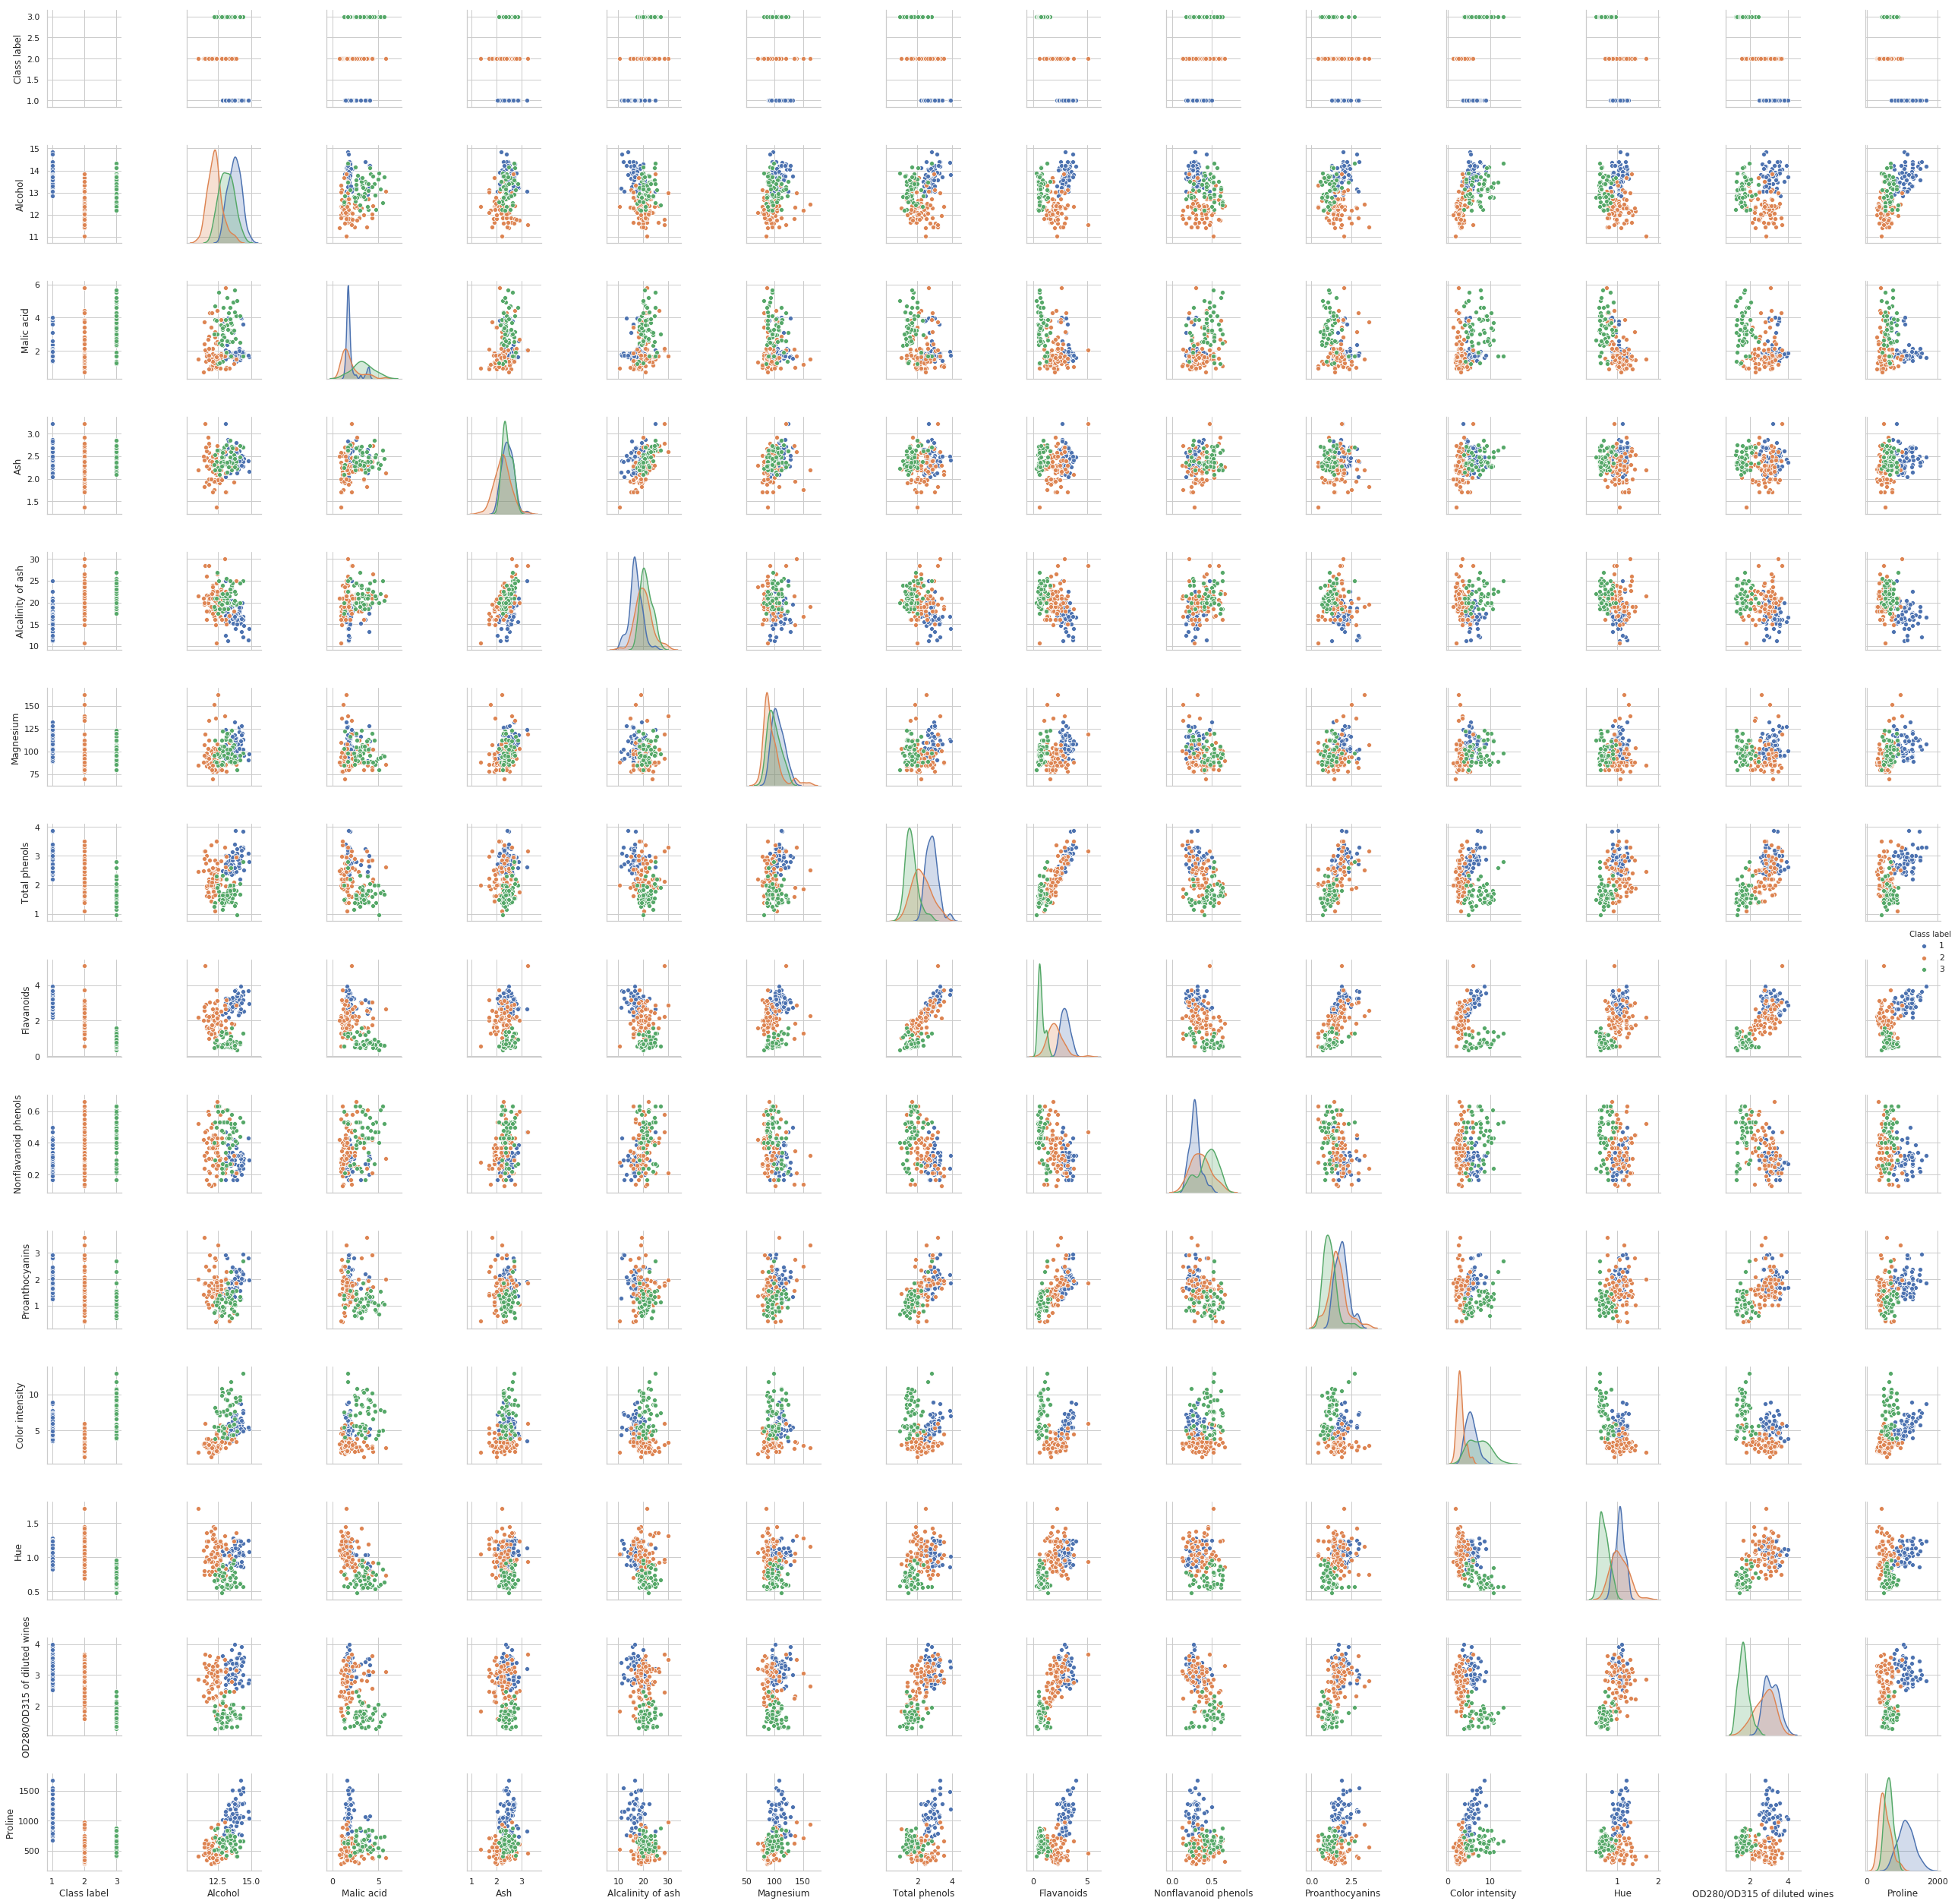

In [5]:
# inline plotting instead of popping out
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

sns.pairplot(df, hue="Class label", size=2.5)
plt.tight_layout()

if not os.path.exists('./output'): #save image into output file, if output file doesnt existr, create one
  os.makedirs('./output')
plt.savefig('./output/fig-wine-scatter.png', dpi=300)
plt.show()

From the above figures, we can easily see that there is a linear relationship between the "Total phenols" and "Flavanoids" variables. Furthermore, the class label cannot be easily predicted by a single variable. You may have noticed that the figures along the diagonal look different. They are histograms of values of individual variables. We can see that the "Ash" and "Alcalinity of ash" variables are roughly normally distributed.

NOTE: importing the Seaborn library modifies the default aesthetics of Matplotlib for the current Python session. If you do not want to use Seaborn's style settings, you can reset the Matplotlib settings by calling:

>>> sns.reset_orig()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


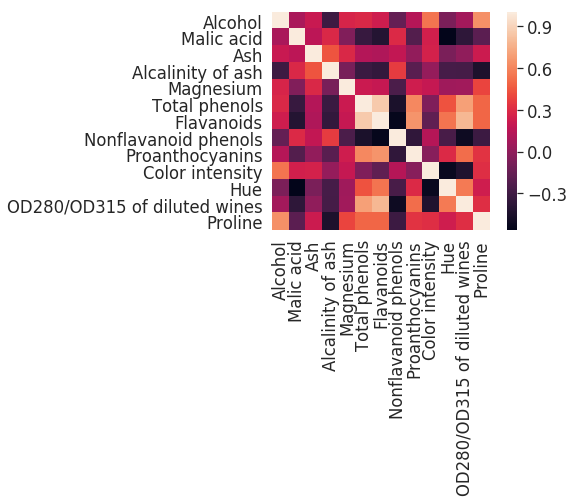

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df.shape[0]
#R = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)

ticklabels = [s for s in X.columns]

hm = sns.heatmap(R,
            cbar=True,
            square=True,
            yticklabels=ticklabels,
            xticklabels=ticklabels)

plt.tight_layout() #避免標籤因超出圖形而被截掉
plt.savefig('./output/fig-wine-corr.png', dpi=300)
plt.show()

sns.reset_orig()


In [13]:
#Eigendecompositions
eigen_vals, eigen_vecs = np.linalg.eigh(R)

print('\nEigenvalues: \n%s' % eigen_vals)
#NOTE: there is an np.linalg.eig() function in NumPy that also eigendecomposes matrices.
#The difference is that np.linalg.eigh() is optimized for symmetric matrices whose eigenvalues are always real numbers.
#The numerically less stable np.linalg.eig() can decompose non-symmetric square matrices and returns complex eigenvalues.


Eigenvalues: 
[0.10337794 0.16877023 0.22578864 0.25090248 0.28887994 0.34849736
 0.55102831 0.64165703 0.85322818 0.91897392 1.44607197 2.49697373
 4.70585025]


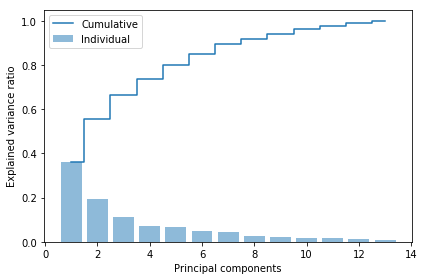

In [14]:
#Eigenvector selection
import matplotlib.pyplot as plt

tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./output/fig-pca-var-exp.png', dpi=300)
plt.show()

The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data. Next, we collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in this dataset. Note that we only chose two eigenvectors for the purpose of illustration, since we are going to plot the data via a two-dimensional scatter plot later in this subsection. In practice, the number of principal components can be determined by other reasons, such as the trade-off between computational efficiency and performance.

### **Feature Transformation**
Let's now proceed with the last three steps to project the standardized Wine dataset onto the new principal component axes. We start by sorting the eigenpairs by decreasing order of the eigenvalues:

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Projection matrix W:\n', W)

Projection matrix W:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


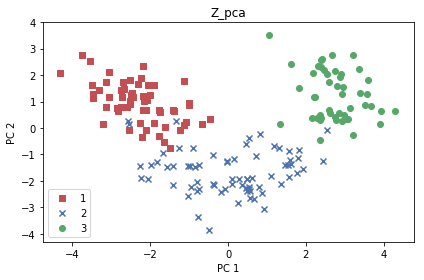

In [17]:
Z_pca = Z.dot(W)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_pca[y.values==l, 0], 
                Z_pca[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('./output/fig-pca-z.png', dpi=300)
plt.show()

As we can see, the data is more spread along the x-axis corresponding to the first principal component than the y-axis (second principal component), which is consistent with the explained variance ratio plot that we created in the previous subsection. PCA may save us from examining a lot of pairwise distributions (as shown in the previous section) when the original data dimension D is high. For example, if we see that the data points with different labels can be separated in the space of PCs, then we can simply choose a linear classifier to do the classification.

Finally, let's save the compressed dataset for future use.

In [0]:
np.save('./output/Z_pca.npy', Z_pca)